## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions


In [1]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
#import sys,os
#sys.path.append(os.path.dirname(os.path.realpath(".")))
df = pd.read_csv('/mnt/wanyao/hhf/mbrl/dataset/20210616-12h19.csv')
data = df[df['tic']=='AXP']
data = data[['date','open','high','low','close','volume']]


In [4]:
data

,date,open,high,low,close,volume
1,1999-12-31,48.287384,49.016800,48.287384,36.115688,1164972
30,2000-01-03,47.995617,47.995617,45.515598,34.160576,6471267
59,2000-01-04,45.315010,45.479130,43.509705,32.870731,10440877
88,2000-01-05,43.910885,44.676769,42.962643,32.035824,8646293
117,2000-01-06,42.452049,44.457947,42.452049,32.688519,10990975
...,...,...,...,...,...,...
156337,2020-12-24,116.930000,117.440002,115.820000,116.589516,707000
156367,2020-12-28,118.050003,119.349998,117.599998,117.592972,1878700
156397,2020-12-29,119.239998,119.349998,118.000000,117.374397,1860400
156427,2020-12-30,118.250000,119.949997,118.150002,118.656036,1954200


In [5]:
#reading the data and converting the Date column into pandas datetime object and also making it the index
df = pd.read_csv('/mnt/wanyao/hhf/mbrl/dataset/20210616-12h19.csv')
data = df[df['tic']=='AXP']
data = data[['date','open','high','low','close','volume']]
data.index = data['date']
data.drop(['date'], axis = 1, inplace = True)
data.index = pd.to_datetime(data.index)

In [6]:
data

,open,high,low,close,volume
date,,,,,
1999-12-31,48.287384,49.016800,48.287384,36.115688,1164972
2000-01-03,47.995617,47.995617,45.515598,34.160576,6471267
2000-01-04,45.315010,45.479130,43.509705,32.870731,10440877
2000-01-05,43.910885,44.676769,42.962643,32.035824,8646293
2000-01-06,42.452049,44.457947,42.452049,32.688519,10990975
...,...,...,...,...,...
2020-12-24,116.930000,117.440002,115.820000,116.589516,707000
2020-12-28,118.050003,119.349998,117.599998,117.592972,1878700
2020-12-29,119.239998,119.349998,118.000000,117.374397,1860400


In [7]:
data.isnull().sum() #checking if there are any null or infinite values

open      0
high      0
low       0
close     0
volume    0
dtype: int64

# Visualizing the Data

In [8]:
data.drop([ 'open' , 'high', 'low', 'volume'], axis = 1, inplace = True)

In [9]:
data

,close
date,
1999-12-31,36.115688
2000-01-03,34.160576
2000-01-04,32.870731
2000-01-05,32.035824
2000-01-06,32.688519
...,...
2020-12-24,116.589516
2020-12-28,117.592972
2020-12-29,117.374397


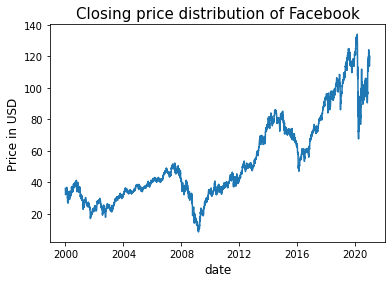

In [10]:
plot.plot(data['close'])
plot.xlabel('date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of Facebook", fontsize=15)
plot.show()

In [11]:
df = data['close']

# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

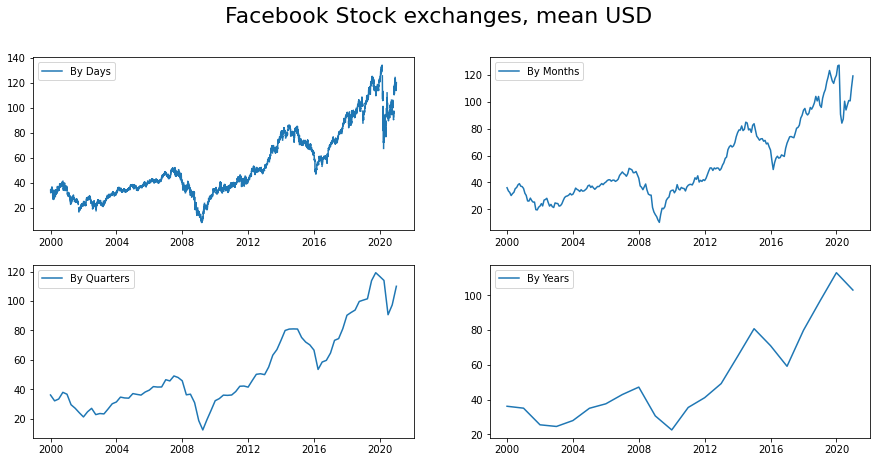

In [12]:
# PLOTS
fig = plot.figure(figsize=[15, 7])
plot.suptitle('Facebook Stock exchanges, mean USD', fontsize=22)

plot.subplot(221)
plot.plot(df, '-', label='By Days')
plot.legend()

plot.subplot(222)
plot.plot(df_month, '-', label='By Months')
plot.legend()

plot.subplot(223)
plot.plot(df_Q, '-', label='By Quarters')
plot.legend()

plot.subplot(224)
plot.plot(df_year, '-', label='By Years')
plot.legend()

# plt.tight_layout()
plot.show()

# Checking Stationarity of the data

In [13]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=22,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationary")
            break
         else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

In [14]:
df = df.fillna(method='ffill')

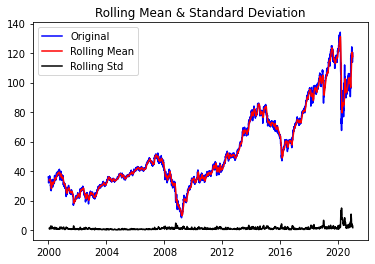

ADF Stastistic: -0.191469
p-value: 0.939531
The graph is non stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [15]:
test_stationarity(df)

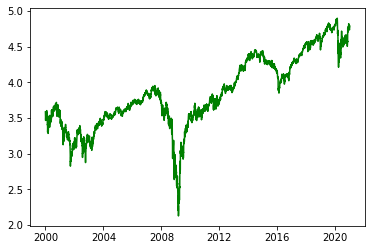

In [16]:
ts_log = np.log(data['close'])
plot.plot(ts_log,color="green")
plot.show()

In [17]:
data['Log transformed'] = ts_log 

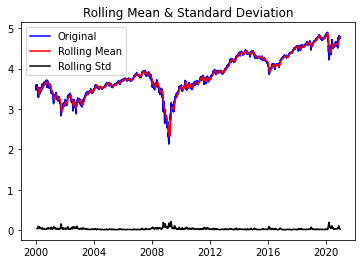

ADF Stastistic: -1.027472
p-value: 0.743113
The graph is non stationary
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [18]:
test_stationarity(data['Log transformed'])

In [19]:
#[1 2 3 4 5 6 7 8 9 10] - [NaN 1 2 3 4 5 6 7 8 9] = [Nan ...]

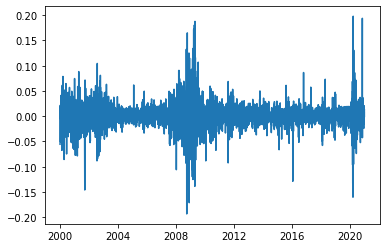

In [20]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

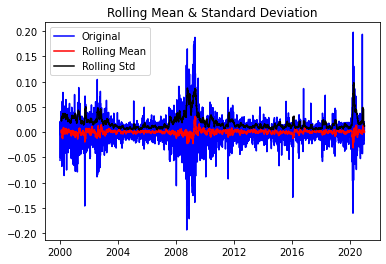

ADF Stastistic: -12.506917
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [21]:
test_stationarity(ts_log_diff.dropna())

In [22]:
data['Shifted Log transformed'] = ts_log_diff

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

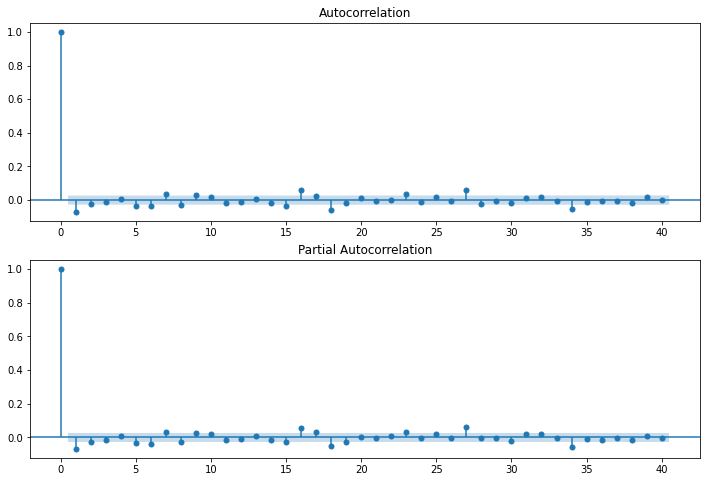

In [24]:
fig = plot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Shifted Log transformed'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Shifted Log transformed'].dropna(),lags=40,ax=ax2)

# Making Predictions

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
size = int(len(ts_log)-365)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

Printing Predicted vs Expected Values...




/mnt/wanyao/hhf/gymenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted = 73.837274,   expected = 74.909149,   error = 1.430900  %
predicted = 74.914464,   expected = 76.500275,   error = 2.072948  %
predicted = 76.578435,   expected = 76.673225,   error = 0.123629  %
predicted = 76.734039,   expected = 78.311295,   error = 2.014085  %
predicted = 78.350831,   expected = 77.253838,   error = 1.419986  %
predicted = 77.374084,   expected = 76.922775,   error = 0.586703  %
predicted = 76.966499,   expected = 77.886337,   error = 1.181001  %
predicted = 77.954592,   expected = 78.748619,   error = 1.008306  %
predicted = 78.803191,   expected = 78.214951,   error = 0.752081  %
predicted = 78.313193,   expected = 78.494141,   error = 0.230524  %
predicted = 78.541119,   expected = 78.872154,   error = 0.419711  %
predicted = 78.954493,   expected = 78.644852,   error = 0.393722  %
predicted = 78.716300,   expected = 76.332275,   error = 3.123219  %
predicted = 76.458327,   expected = 78.491669,   error = 2.590519  %
predicted = 78.469343,   expected 

KeyboardInterrupt: 